In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

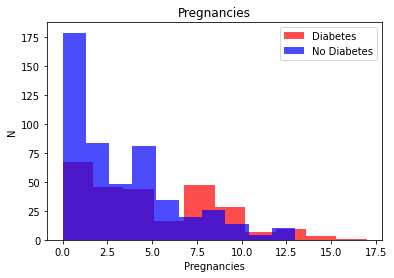

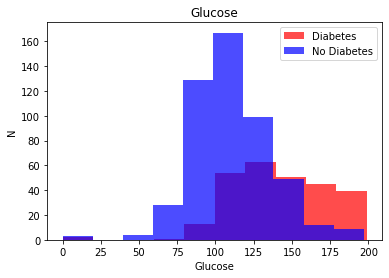

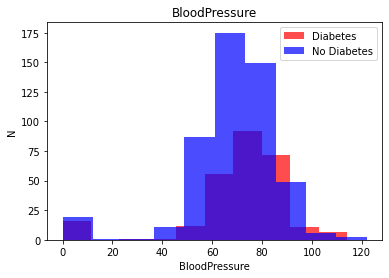

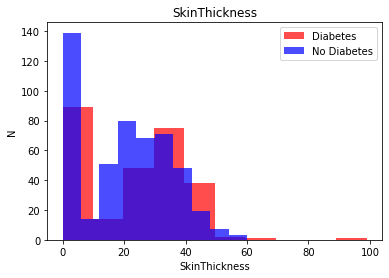

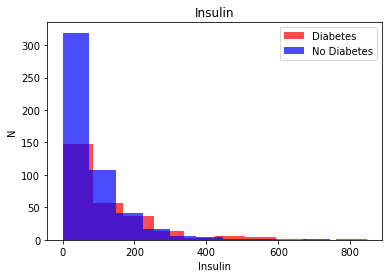

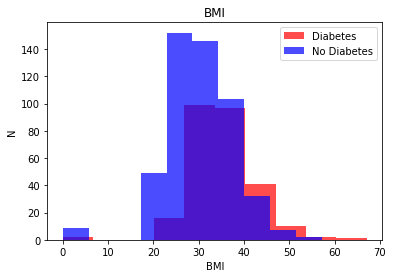

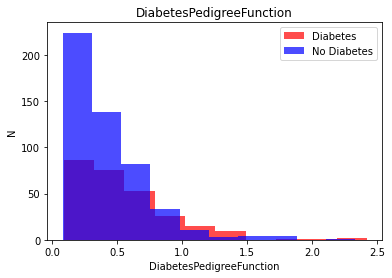

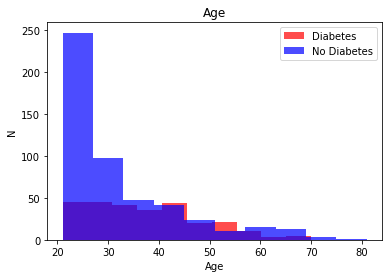

In [4]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color ='red',label='Diabetes',alpha=0.7)
    plt.hist(df[df['Outcome']==0][label],color ='blue',label='No Diabetes',alpha=0.7)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('N')
    plt.legend()
    plt.show()

densitybool, default: False

If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

If stacked is also True, the sum of the histograms is normalized to 1.

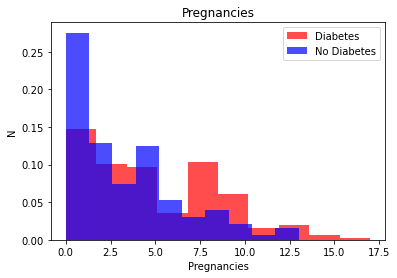

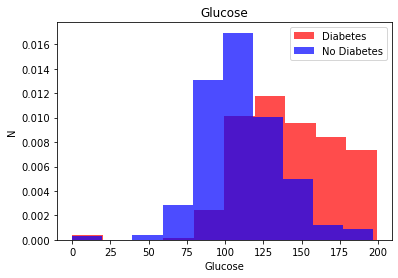

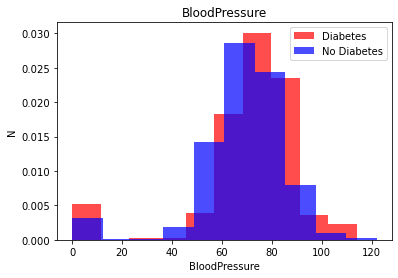

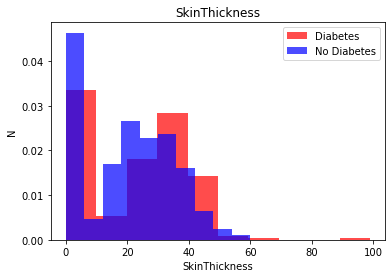

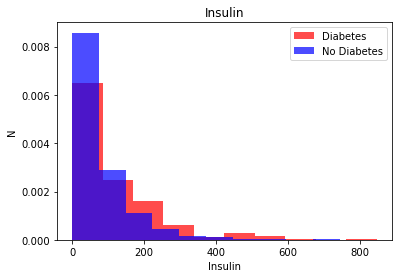

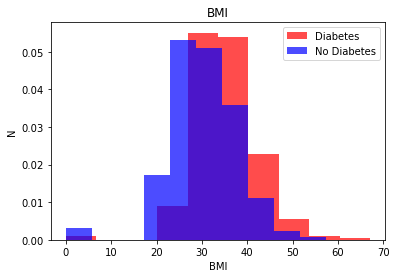

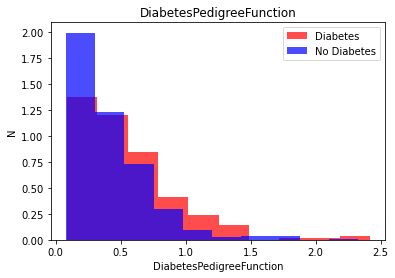

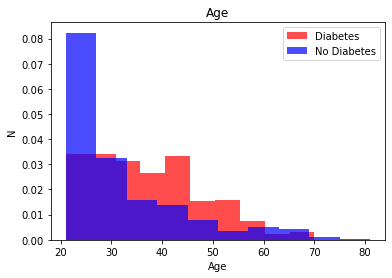

In [5]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color ='red',label='Diabetes',density =True,alpha=0.7)
    plt.hist(df[df['Outcome']==0][label],color ='blue',label='No Diabetes',density =True,alpha=0.7)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('N')
    plt.legend()
    plt.show()

In [6]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [7]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.4,random_state = 0)
X_valid, X_test,y_valid,y_test = train_test_split(X_temp,y_temp,test_size = 0.5,random_state = 0)

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss= tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train)

15/15 [==============================] - 1s 3ms/step - loss: 25.0329 - accuracy: 0.6413


In [14]:
model.evaluate(X_valid,y_valid)

5/5 [==============================] - 0s 3ms/step - loss: 16.2559 - accuracy: 0.6494


[16.255868911743164, 0.649350643157959]

In [15]:
model.fit(X_train,y_train,batch_size = 5,epochs = 100,validation_data=(X_valid,y_valid))

Epoch 1/100
92/92 [==============================] - 0s 3ms/step - loss: 5.7909 - accuracy: 0.5196 - val_loss: 2.4588 - val_accuracy: 0.4481
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 1.4428 - accuracy: 0.5652 - val_loss: 1.1987 - val_accuracy: 0.5649
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 1.0442 - accuracy: 0.6130 - val_loss: 0.9607 - val_accuracy: 0.6039
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.9315 - accuracy: 0.6065 - val_loss: 0.8954 - val_accuracy: 0.6364
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.8301 - accuracy: 0.6283 - val_loss: 0.8824 - val_accuracy: 0.6429
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.6326 - val_loss: 0.8409 - val_accuracy: 0.6494
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.7705 - accuracy: 0.6543 - val_loss: 0.8179 - val_accuracy: 0.6299
Epoch 8/100
9

Epoch 59/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7370 - val_loss: 0.6437 - val_accuracy: 0.7338
Epoch 60/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7326 - val_loss: 0.8064 - val_accuracy: 0.6948
Epoch 61/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7304 - val_loss: 0.6221 - val_accuracy: 0.7013
Epoch 62/100
92/92 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7000 - val_loss: 0.6603 - val_accuracy: 0.6883
Epoch 63/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7261 - val_loss: 0.6612 - val_accuracy: 0.6883
Epoch 64/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7326 - val_loss: 0.6765 - val_accuracy: 0.6883
Epoch 65/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.7565 - val_loss: 0.6479 - val_accuracy: 0.7078
Epoch 

# Using Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [26]:
X = sc.fit_transform(X)

In [20]:
X.shape

(768, 8)

In [21]:
y.shape

(768,)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss= tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,batch_size = 5,epochs = 100,validation_data=(X_valid,y_valid))

Epoch 1/100
92/92 [==============================] - 1s 4ms/step - loss: 31.0550 - accuracy: 0.5174 - val_loss: 6.2371 - val_accuracy: 0.3506
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 5.7052 - accuracy: 0.4522 - val_loss: 2.7755 - val_accuracy: 0.5195
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 2.6055 - accuracy: 0.5391 - val_loss: 1.8366 - val_accuracy: 0.6104
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 1.7320 - accuracy: 0.6022 - val_loss: 2.0114 - val_accuracy: 0.6429
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 1.5550 - accuracy: 0.6043 - val_loss: 1.5521 - val_accuracy: 0.6104
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 1.3132 - accuracy: 0.6130 - val_loss: 1.6458 - val_accuracy: 0.5519
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 1.3983 - accuracy: 0.6261 - val_loss: 1.4556 - val_accuracy: 0.5584
Epoch 8/100


Epoch 59/100
92/92 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.7000 - val_loss: 0.6016 - val_accuracy: 0.7013
Epoch 60/100
92/92 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.7022 - val_loss: 0.5858 - val_accuracy: 0.7013
Epoch 61/100
92/92 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.7196 - val_loss: 0.5749 - val_accuracy: 0.6883
Epoch 62/100
92/92 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.7261 - val_loss: 1.0612 - val_accuracy: 0.6429
Epoch 63/100
92/92 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.7109 - val_loss: 0.6168 - val_accuracy: 0.7078
Epoch 64/100
92/92 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.7326 - val_loss: 0.7447 - val_accuracy: 0.6818
Epoch 65/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7283 - val_loss: 0.6212 - val_accuracy: 0.7078
Epoch 

# Using Oversampling

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
over = RandomOverSampler()

In [27]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [28]:
X,y = over.fit_resample(X,y)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss= tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
model.fit(X_train,y_train,batch_size = 5,epochs = 100,validation_data=(X_valid,y_valid))

Epoch 1/100
92/92 [==============================] - 1s 4ms/step - loss: 3.8216 - accuracy: 0.4348 - val_loss: 1.8092 - val_accuracy: 0.4740
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 1.6431 - accuracy: 0.4804 - val_loss: 1.2587 - val_accuracy: 0.5260
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 1.2372 - accuracy: 0.5435 - val_loss: 1.0277 - val_accuracy: 0.5130
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 1.0288 - accuracy: 0.5630 - val_loss: 0.8103 - val_accuracy: 0.5325
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.9039 - accuracy: 0.5435 - val_loss: 0.7527 - val_accuracy: 0.5519
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.7853 - accuracy: 0.5848 - val_loss: 0.7207 - val_accuracy: 0.5844
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.6087 - val_loss: 0.6853 - val_accuracy: 0.5714
Epoch 8/100
9

Epoch 59/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.7391 - val_loss: 0.6566 - val_accuracy: 0.6753
Epoch 60/100
92/92 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7478 - val_loss: 0.6191 - val_accuracy: 0.6623
Epoch 61/100
92/92 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7457 - val_loss: 0.5579 - val_accuracy: 0.7013
Epoch 62/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7370 - val_loss: 0.5892 - val_accuracy: 0.6948
Epoch 63/100
92/92 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.7348 - val_loss: 0.5591 - val_accuracy: 0.6948
Epoch 64/100
92/92 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7609 - val_loss: 0.5626 - val_accuracy: 0.6883
Epoch 65/100
92/92 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.7478 - val_loss: 0.5710 - val_accuracy: 0.6818
Epoch 